# Tarea 2 (fecha de entrega: 23 de Julio 2023, 23:59)
Esta tarea consiste en 8 preguntas con un puntaje total de 7 pts. La nota será el maximo entre el puntaje obtenido mas el punto base y 7:

$$nota=\min(7, puntaje+1)$$

Se espera el codigo asociado a la respuesta y comentarios que hagan comprensible la lectura de la solución. Puede entregar la tarea en el formato que estime conveniente (doc, pdf, script de R, url de Kaggle) pero tenga en cuenta que debe adjuntar el código utilizado. Se recomienda el uso de Kaggle (recordar dejar el notebook compartido con el ayudante para que este pueda abrirlo).

# Rpostgres setup

Para iniciar el servidor virtual, instalar la base de datos postgres, y descargar los datos e importarlos, debe correr los siguientes bloques.

In [1]:
library("DBI")
library("tidyverse")
library("RPostgres")
library("RODBC")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
system("sudo apt install -y postgresql postgresql-contrib &>log", intern=T)
system("service postgresql start", intern = T)
system("sudo -u postgres psql -c \"CREATE USER root WITH SUPERUSER\"", intern=T)
system("sudo -u postgres createdb sakila", intern=T)
system("wget https://raw.githubusercontent.com/jOOQ/sakila/main/postgres-sakila-db/postgres-sakila-schema.sql", intern=T)
system("wget https://github.com/jOOQ/sakila/raw/main/postgres-sakila-db/postgres-sakila-insert-data.sql", intern=T)
system("psql sakila < /kaggle/working/postgres-sakila-schema.sql",intern=T)
system("psql sakila < /kaggle/working/postgres-sakila-insert-data.sql",intern=T)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
  [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
  [5] "  cron libpopt0 libpq-dev libpq5 libxslt1.1 logrotate postgresql-12"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
  [6] "  postgresql-client-12 postgresql-client-common postgresql-common ssl-cert"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [7] "  sysstat"                                                                                                             

[1] " * Starting PostgreSQL 12 database server"
[2] "   ...done."

[1] "CREATE ROLE"

character(0)

character(0)

character(0)

[1] "SET"              "SET"              "SET"             
  [4] "SET"              "SET"              "COMMENT"         
  [7] "CREATE LANGUAGE"  "ALTER LANGUAGE"   "SET"             
 [10] "CREATE SEQUENCE"  "ALTER TABLE"      "SET"             
 [13] "SET"              "CREATE TABLE"     "ALTER TABLE"     
 [16] "CREATE TYPE"      "ALTER TYPE"       "CREATE DOMAIN"   
 [19] "ALTER DOMAIN"     "CREATE FUNCTION"  "ALTER FUNCTION"  
 [22] "CREATE AGGREGATE" "ALTER AGGREGATE"  "CREATE SEQUENCE" 
 [25] "ALTER TABLE"      "CREATE TABLE"     "ALTER TABLE"     
 [28] "CREATE SEQUENCE"  "ALTER TABLE"      "CREATE TABLE"    
 [31] "ALTER TABLE"      "CREATE TABLE"     "ALTER TABLE"     
 [34] "CREATE TABLE"     "ALTER TABLE"      "CREATE VIEW"     
 [37] "ALTER TABLE"      "CREATE SEQUENCE"  "ALTER TABLE"     
 [40] "CREATE TABLE"     "ALTER TABLE"      "CREATE SEQUENCE" 
 [43] "ALTER TABLE"      "CREATE TABLE"     "ALTER TABLE"     
 [46] "CREATE SEQUENCE"  "ALTER TABLE"      "CREATE TABLE"    
 [49] "ALTER TABLE"      "CREATE SEQUENCE"  "ALTER TABLE"     
 [52] "CREATE TABLE"     "ALTER TABLE"      "CREATE VIEW"     
 [55] "ALTER TABLE"      "CREATE VIEW"      "ALTER TABLE"     
 [58] "CREATE SEQUENCE"  "ALTER TABLE"      "CREATE TABLE"    
 [61] "ALTER TABLE"      "CREATE SEQUENCE"  "ALTER TABLE"     
 [64] "CREATE TABLE"     "ALTER TABLE"      "CREATE VIEW"     
 [67] "ALTER TABLE"      "CREATE SEQUENCE"  "ALTER TABLE"     
 [70] "CREATE TABLE"     "ALTER TABLE"      "CREATE TABLE"    
 [73] "ALTER TABLE"      "CREATE TABLE"     "ALTER TABLE"     
 [76] "CREATE TABLE"     "ALTER TABLE"      "CREATE TABLE"    
 [79] "ALTER TABLE"      "CREATE TABLE"     "ALTER TABLE"     
 [82] "CREATE TABLE"     "ALTER TABLE"      "CREATE SEQUENCE" 
 [85] "ALTER TABLE"      "CREATE TABLE"     "ALTER TABLE"     
 [88] "CREATE VIEW"      "ALTER TABLE"      "CREATE SEQUENCE" 
 [91] "ALTER TABLE"      "CREATE TABLE"     "ALTER TABLE"     
 [94] "CREATE SEQUENCE"  "ALTER TABLE"      "CREATE TABLE"    
 [97] "ALTER TABLE"      "CREATE VIEW"      "ALTER TABLE"     
[100] "CREATE VIEW"      "ALTER TABLE"      "CREATE FUNCTION" 
[103] "ALTER FUNCTION"   "CREATE FUNCTION"  "ALTER FUNCTION"  
[106] "CREATE FUNCTION"  "ALTER FUNCTION"   "CREATE FUNCTION" 
[109] "ALTER FUNCTION"   "CREATE FUNCTION"  "ALTER FUNCTION"  
[112] "CREATE FUNCTION"  "ALTER FUNCTION"   "CREATE FUNCTION" 
[115] "ALTER FUNCTION"   "CREATE FUNCTION"  "ALTER FUNCTION"  
[118] "ALTER TABLE"      "ALTER TABLE"      "ALTER TABLE"     
[121] "ALTER TABLE"      "ALTER TABLE"      "ALTER TABLE"     
[124] "ALTER TABLE"      "ALTER TABLE"      "ALTER TABLE"     
[127] "ALTER TABLE"      "ALTER TABLE"      "ALTER TABLE"     
[130] "ALTER TABLE"      "ALTER TABLE"      "ALTER TABLE"     
[133] "CREATE INDEX"     "CREATE INDEX"     "CREATE INDEX"    
[136] "CREATE INDEX"     "CREATE INDEX"     "CREATE INDEX"    
[139] "CREATE INDEX"     "CREATE INDEX"     "CREATE INDEX"    
[142] "CREATE INDEX"     "CREATE INDEX"     "CREATE INDEX"    
[145] "CREATE INDEX"     "CREATE INDEX"     "CREATE INDEX"    
[148] "CREATE INDEX"     "CREATE INDEX"     "CREATE INDEX"    
[151] "CREATE INDEX"     "CREATE INDEX"     "CREATE INDEX"    
[154] "CREATE INDEX"     "CREATE INDEX"     "CREATE INDEX"    
[157] "CREATE INDEX"     "CREATE INDEX"     "CREATE INDEX"    
[160] "CREATE INDEX"     "CREATE INDEX"     "CREATE RULE"     
[163] "CREATE RULE"      "CREATE RULE"      "CREATE RULE"     
[166] "CREATE RULE"      "CREATE RULE"      "CREATE TRIGGER"  
[169] "CREATE TRIGGER"   "CREATE TRIGGER"   "CREATE TRIGGER"  
[172] "CREATE TRIGGER"   "CREATE TRIGGER"   "CREATE TRIGGER"  
[175] "CREATE TRIGGER"   "CREATE TRIGGER"   "CREATE TRIGGER"  
[178] "CREATE TRIGGER"   "CREATE TRIGGER"   "CREATE TRIGGER"  
[181] "CREATE TRIGGER"   "CREATE TRIGGER"   "ALTER TABLE"     
[184] "ALTER TABLE"      "ALTER TABLE"      "ALTER TABLE"     
[187] "ALTER TABLE"      "ALTER TABLE"      "ALTER TABLE"     
[190] "ALTER TABLE"      "ALTER T

[1] "SET"         "SET"         "SET"         "SET"         "SET"        
    [6] "SET"         " setval "    "--------"    "    200"     "(1 row)"    
   [11] ""            " setval "    "--------"    "     16"     "(1 row)"    
   [16] ""            " setval "    "--------"    "   1000"     "(1 row)"    
   [21] ""            " setval "    "--------"    "    605"     "(1 row)"    
   [26] ""            " setval "    "--------"    "    600"     "(1 row)"    
   [31] ""            " setval "    "--------"    "    109"     "(1 row)"    
   [36] ""            " setval "    "--------"    "    599"     "(1 row)"    
   [41] ""            " setval "    "--------"    "   4581"     "(1 row)"    
   [46] ""            " setval "    "--------"    "      6"     "(1 row)"    
   [51] ""            " setval "    "--------"    "  32098"     "(1 row)"    
   [56] ""            " setval "    "--------"    "  16049"     "(1 row)"    
   [61] ""            " setval "    "--------"    "      2"     "(1 row)"    
   [66] ""            " setval "    "--------"    "      2"     "(1 row)"    
   [71] ""            "ALTER TABLE" "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
   [76] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "ALTER TABLE" "ALTER TABLE"
   [81] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
   [86] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
   [91] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
   [96] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [101] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [106] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [111] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [116] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [121] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [126] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [131] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [136] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [141] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [146] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [151] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [156] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [161] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [166] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [171] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [176] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [181] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [186] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "ALTER TABLE"
  [191] "ALTER TABLE" "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [196] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [201] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [206] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [211] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [216] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [221] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [226] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [231] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [236] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [241] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [246] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [251] "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1"  "INSERT 0 1" 
  [256] "INSERT 0 1"  "INS

In [3]:
library(tidyverse)
theme_set(theme_grey(base_size = 20)) 
options(repr.plot.width=15, repr.plot.height=15)

# Connect

In [4]:
con <- dbConnect(RPostgres::Postgres(),dbname = 'sakila', user="root", password = 'PASSWORD')


In [5]:
dbListTables(con) #lista de tablas

[1] "address"                    "city"                      
 [3] "film_actor"                 "actor"                     
 [5] "film_category"              "inventory"                 
 [7] "actor_info"                 "category"                  
 [9] "country"                    "customer"                  
[11] "customer_list"              "film_list"                 
[13] "language"                   "rental"                    
[15] "payment_p2007_06"           "nicer_but_slower_film_list"
[17] "film"                       "payment_p2007_04"          
[19] "payment_p2007_02"           "payment_p2007_03"          
[21] "payment_p2007_05"           "staff"                     
[23] "sales_by_film_category"     "payment_p2007_01"          
[25] "payment"                    "sales_by_store"            
[27] "staff_list"                 "store"

A continuación se muestra un modelo E/R simplificado (sin atributos ni multiplicidades) para ilustrar las tablas y las relaciones entre ellas.

Importante: Note que una relación (rombo) no necesariamente significa que corresponda a una tabla en la base de datos (la relación puede estar dada por algún(os) atributo(s) de una de las dos entidades).


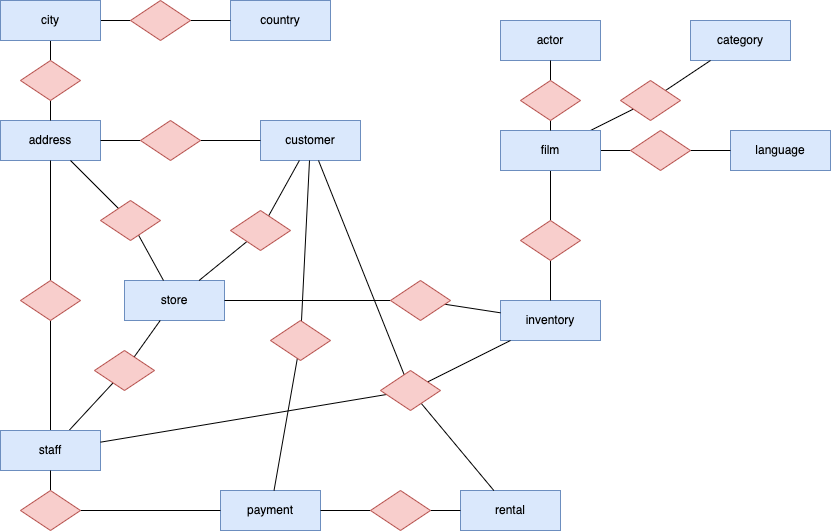

![sakila](https://codeandwork.github.io/courses/java/media/dbschema5.png)

Para explorar exactamente los atributos y las conexiones con otras tablas pueden ejecutar el comando ```\d [nombre_tabla]```. Por ejemplo:

In [6]:
print(system("psql sakila -c '\\d film'", intern=T))

 [1] "                                                Table \"public.film\""                                                                                                    
 [2] "        Column        |            Type             | Collation | Nullable |                Default                "                                                      
 [3] "----------------------+-----------------------------+-----------+----------+---------------------------------------"                                                      
 [4] " film_id              | integer                     |           | not null | nextval('film_film_id_seq'::regclass)"                                                       
 [5] " title                | character varying(255)      |           | not null | "                                                                                            
 [6] " description          | text                        |           |          | "                               

# Pregunta 1 (0.5 pts)
Averigue cuáles actores tienen como primer nombre 'Scarlett'SCARLETT

In [7]:
query <- "
SELECT first_name, last_name
FROM actor
WHERE first_name = 'SCARLETT';
"
dbGetQuery(con, query)

first_name,last_name
<chr>,<chr>
SCARLETT,DAMON
SCARLETT,BENING


# Pregunta 2 (0.5 pts)
¿Cuántas peliculas existen en la base de datos?

In [ ]:
query <- "
SELECT COUNT(*) AS total_peliculas
FROM film
"
dbGetQuery(con,query)

# Pregunta 3 (1 pt)
a) (0.7 pts) Muestre la cantidad de películas por categoría 

In [8]:
query <- "
SELECT name AS Categoria, COUNT(film_id) AS cantidad
FROM category, film_category
WHERE category.category_id = film_category.category_id
GROUP BY name
"
dbGetQuery(con, query)

categoria,cantidad
<chr>,<int64>
Sports,74
Classics,57
New,63
Family,69
Comedy,58
Animation,66
Travel,57
Music,51
Drama,62


b) (0.3 pts) Muestre estos resultados en un grafico de barras, ordenados segun id de categoria 

categoria,cantidad
<chr>,<dbl>
Action,64
Animation,66
Children,60
Classics,57
Comedy,58
Documentary,68
Drama,62
Family,69
Foreign,73


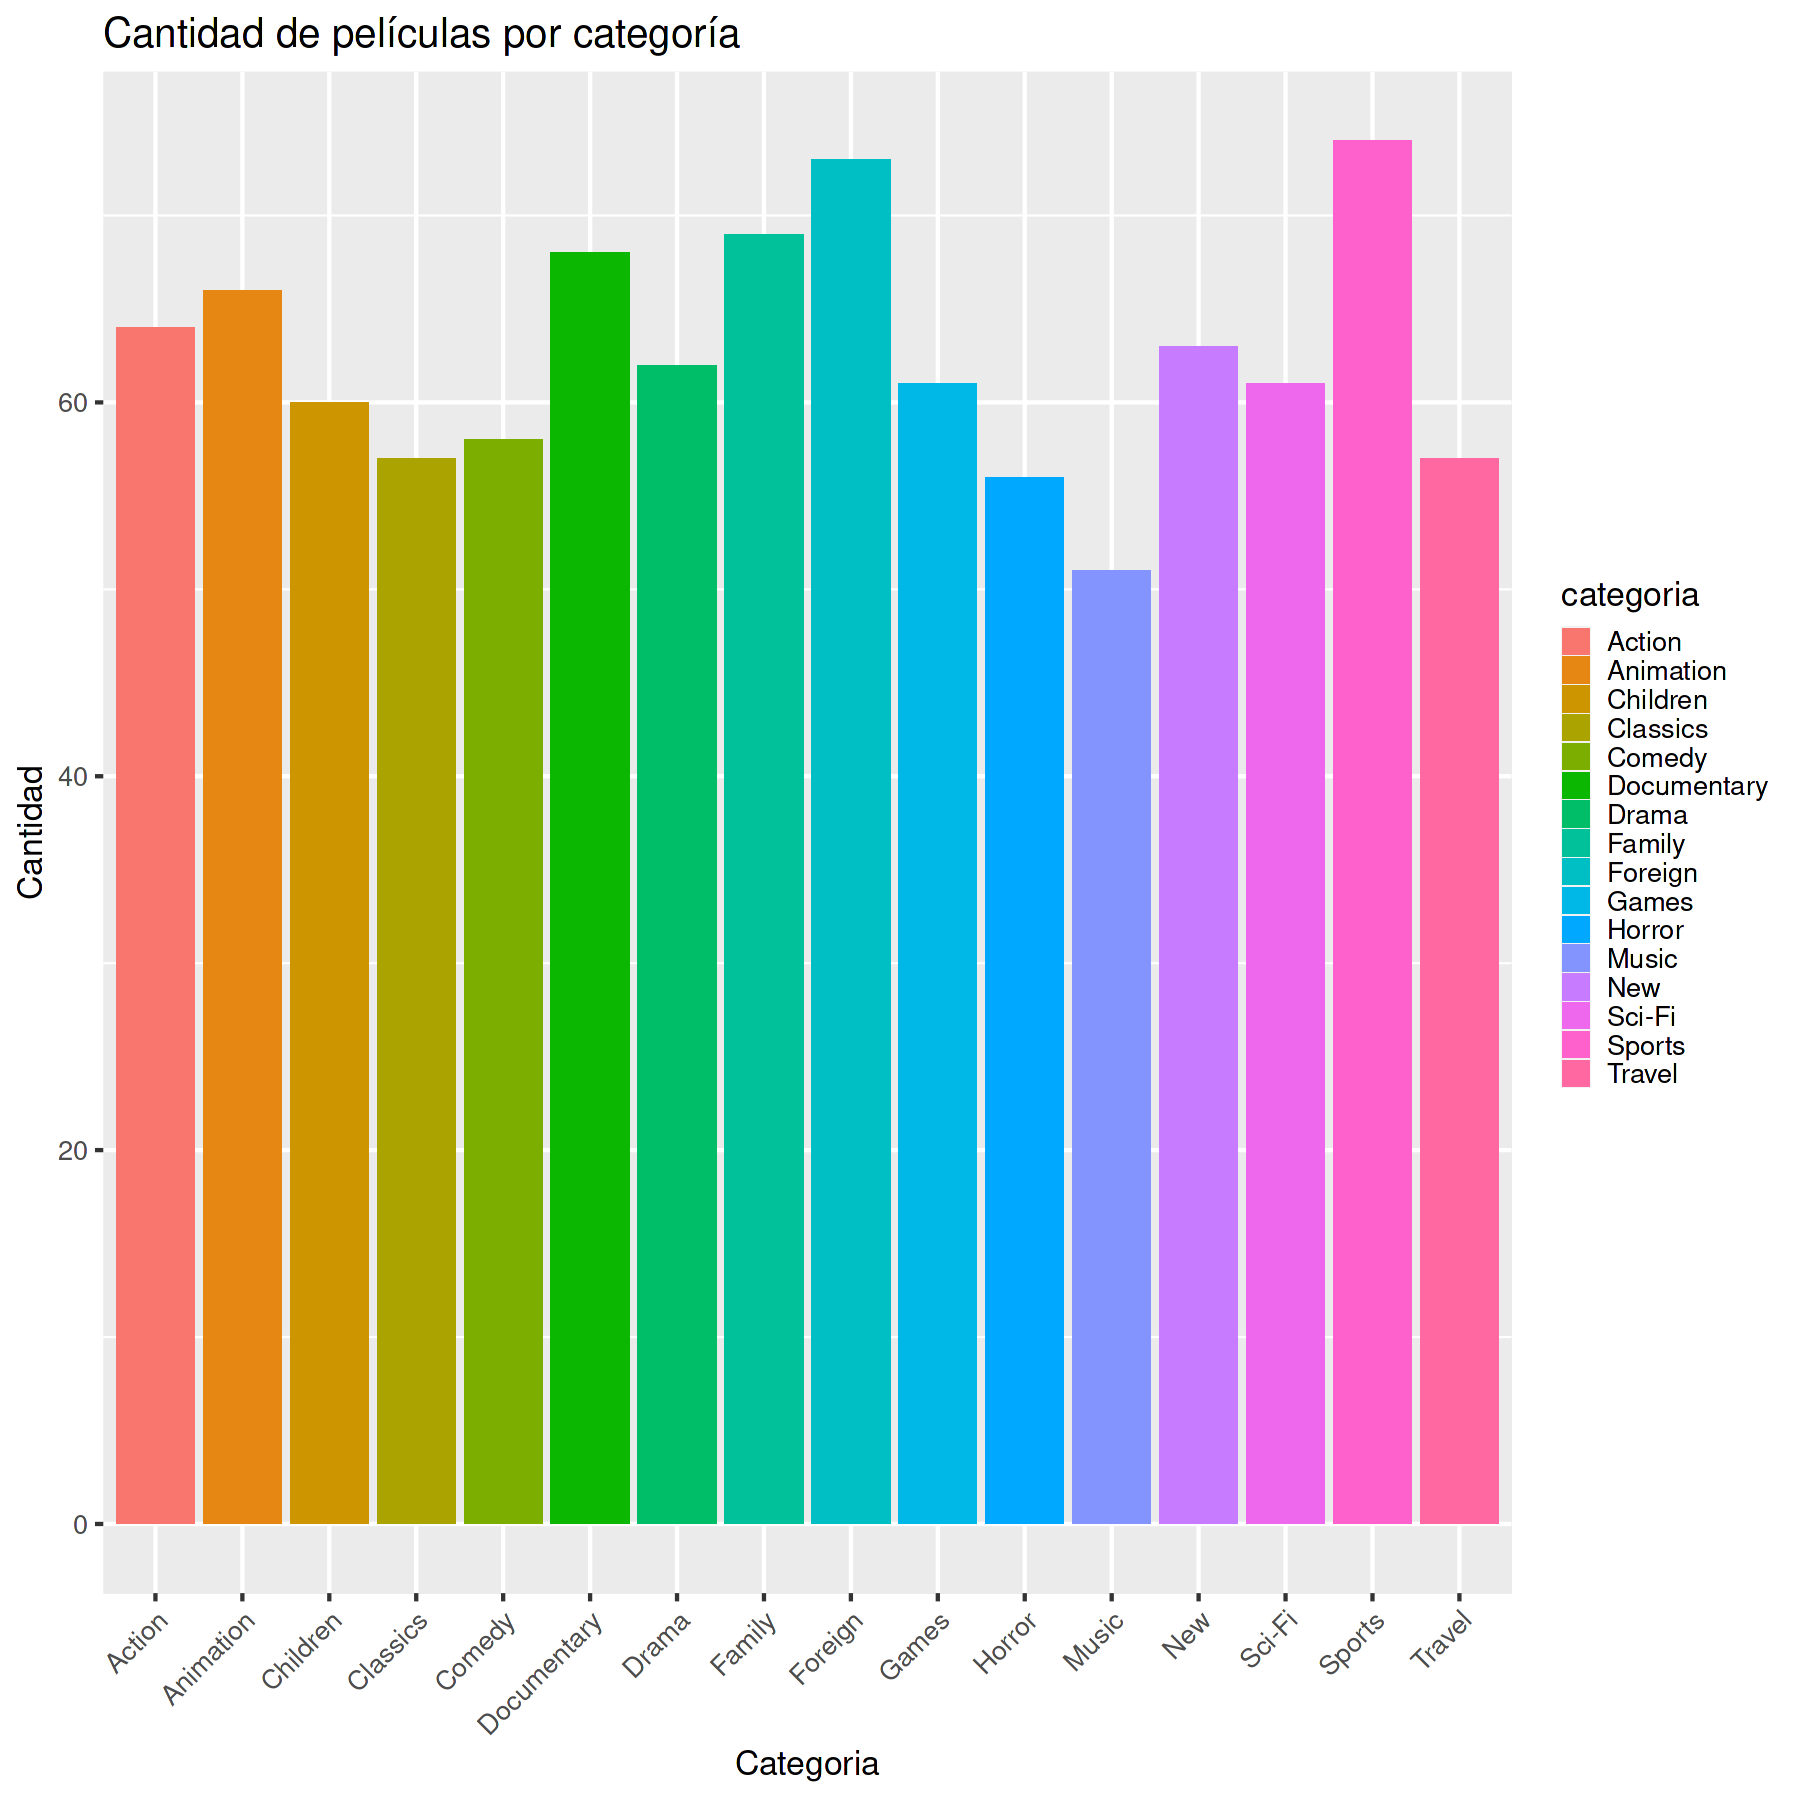

In [9]:
query <- "
SELECT name AS Categoria, COUNT(film_id) AS cantidad
FROM category, film_category
WHERE category.category_id = film_category.category_id
GROUP BY name
ORDER BY name
"
category_sum <- dbGetQuery(con, query)

category_sum$cantidad <- as.double(category_sum$cantidad)
category_sum

ggplot(category_sum, aes(categoria, cantidad, fill = categoria)) +
    geom_bar(stat = 'identity') +
    labs(title = "Cantidad de películas por categoría",
        x = "Categoria",
        y = "Cantidad") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Pregunta 4 (0.8 pts)
Muestre cuál es la categoría de peliculas más popular. Es decir, la categoria de peliculas que más se renta.

In [10]:
query <- "
SELECT category.name AS categoria, COUNT(rental_id) AS cantidad
FROM rental, inventory, film_category, category
WHERE rental.inventory_id = inventory.inventory_id AND
    inventory.film_id = film_category.film_id AND
    film_category.category_id = category.category_id
GROUP BY category.name
ORDER BY cantidad DESC
LIMIT 1;
"
dbGetQuery(con, query)

categoria,cantidad
<chr>,<int64>
Sports,1179


# Pregunta 5 (1 pt)
a) (0.4 pts) Calcule la cantidad de arriendos hechos por clientes que viven en 'Chile' 

In [11]:
query <- "
SELECT
    country, COUNT(rental_id) AS cantidad
FROM
    country, city, address, customer, rental
WHERE
    country.country_id = city.country_id AND
    city.city_id = address.city_id AND
    address.address_id = customer.address_id AND
    customer.customer_id = rental.customer_id
GROUP BY country.country
HAVING country = 'Chile';
"
dbGetQuery(con, query)

country,cantidad
<chr>,<int64>
Chile,71


b) (0.4 pts) Calcule la cantidad de arriendos de personas que viven en 'Chile' pero agrupados por ciudad.


In [12]:
query <- "
WITH tabla1 AS (
SELECT
    country, city, rental_id
FROM
    country, city, address, customer, rental
WHERE
    country.country_id = city.country_id AND
    city.city_id = address.city_id AND
    address.address_id = customer.address_id AND
    customer.customer_id = rental.customer_id)
SELECT city, COUNT(rental_id)
FROM tabla1
WHERE country = 'Chile'
GROUP BY city;
"
dbGetQuery(con, query)

city,count
<chr>,<int64>
Antofagasta,27
Rancagua,16
Coquimbo,28


b) (0.2 pts) Realice un grafico de torta con el resultado de la consulta anterior. Para ello utilicen el comando siguiente

```
ggplot(data, aes(x="", y=count, fill=city)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)
```
donde data es un dataframe con las columnas: 
- city: el nombre de la ciudad 
- count: el numero de arriendos por ciudad




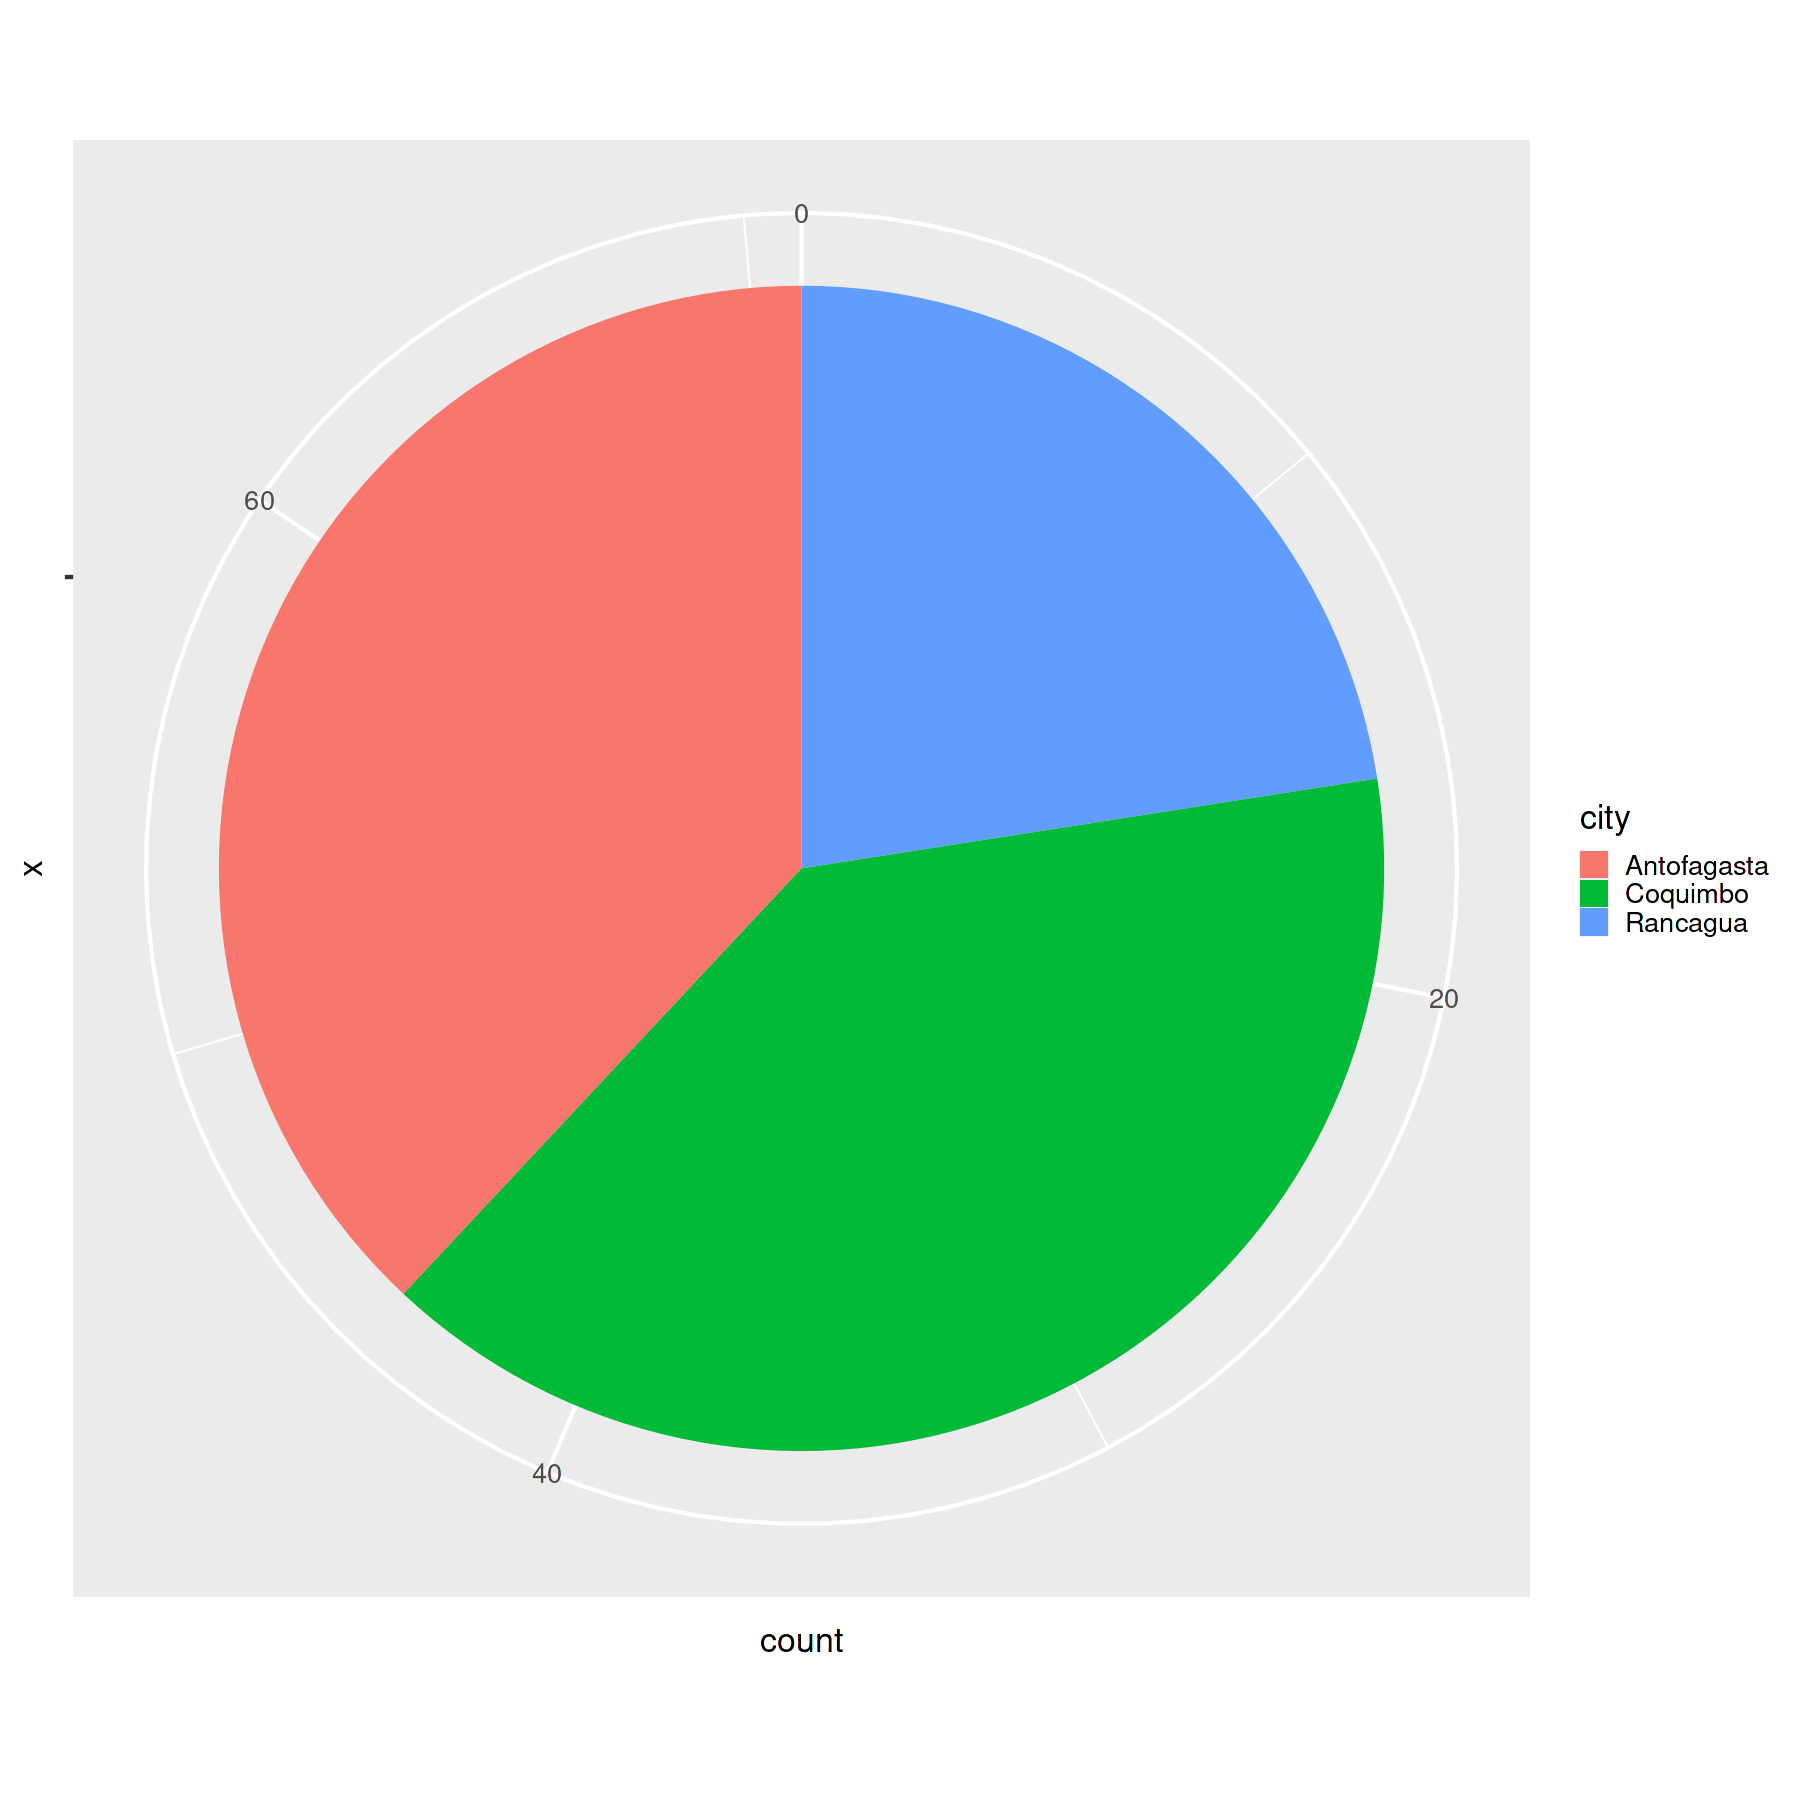

In [13]:
query <- "
WITH tabla1 AS (
SELECT
    country, city, rental_id
FROM
    country, city, address, customer, rental
WHERE
    country.country_id = city.country_id AND
    city.city_id = address.city_id AND
    address.address_id = customer.address_id AND
    customer.customer_id = rental.customer_id)
SELECT city, COUNT(rental_id)
FROM tabla1
WHERE country = 'Chile'
GROUP BY city;
"
data <- dbGetQuery(con, query)
data$count <- as.double(data$count)

ggplot(data, aes(x="", y=count, fill=city)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)

# Pregunta 6 (1 pts)
a) (0.5 pts) Calcule los ingresos diarios por ciudad.

In [19]:
query <- "
WITH tabla1 AS(
SELECT
    amount, DATE(payment_date) as date, city
FROM
    payment, staff, store, address, city
WHERE
    payment.staff_id = staff.staff_id AND
    staff.store_id = store.store_id AND
    store.address_id = address.address_id AND
    address.city_id = city.city_id)
SELECT city, date, SUM(amount) AS ingresos
FROM tabla1
GROUP BY city, date;
"
dbGetQuery(con, query)

city,date,ingresos
<chr>,<date>,<dbl>
Lethbridge,2005-05-24,15.96
Lethbridge,2005-05-25,323.27
Lethbridge,2005-05-26,401.04
Lethbridge,2005-05-27,357.16
Lethbridge,2005-05-28,480.81
Lethbridge,2005-05-29,354.21
Lethbridge,2005-05-30,339.17
Lethbridge,2005-05-31,350.21
Lethbridge,2005-06-14,11.96


b) (0.3 pts) Obtenga los ingresos por dia de Woodridge entre los dias '2005-05-24' y '2005-06-1'




In [23]:
query <- "
WITH tabla1 AS(
SELECT
    amount, DATE(payment_date) as date, city
FROM
    payment, staff, store, address, city
WHERE
    payment.staff_id = staff.staff_id AND
    staff.store_id = store.store_id AND
    store.address_id = address.address_id AND
    address.city_id = city.city_id)
SELECT city, date, SUM(amount) AS ingresos
FROM tabla1
GROUP BY city, date
HAVING city = 'Woodridge' AND
    date >= '2005-05-24' AND
    date <= '2005-06-1';
"
dbGetQuery(con, query)

city,date,ingresos
<chr>,<date>,<dbl>
Woodridge,2005-05-24,13.96
Woodridge,2005-05-25,250.36
Woodridge,2005-05-26,353.22
Woodridge,2005-05-27,328.17
Woodridge,2005-05-28,323.23
Woodridge,2005-05-29,294.25
Woodridge,2005-05-30,289.25
Woodridge,2005-05-31,350.16


c) (0.2 pts) Haga un grafico de linea para los ingresos por dia de Woodridge entre los dias '2005-05-24' y '2005-06-1'

hint: use `geom_line`


# Pregunta 7 (1.7 pts)
Se define que una película es ''larga'' si es que es mayor que la duración promedio.
Una categoría de película es ''larga'' si es que el promedio de dureción de películas con esa categoría es mayor al promedio de duración de todas las películas.

a) (0.2 pts) Obtenga la duracion promedio de todas las peliculas de la base de datos.

In [ ]:
query <- "
SELECT SUM(length) / (SELECT COUNT(*) FROM film) AS duracion_media
FROM film;
"
dbGetQuery(con, query)

b) (0.4 pts) Obtenga todas las peliculas ''largas''.

In [ ]:
query <- "
WITH media AS (
SELECT SUM(length) / (SELECT COUNT(*) FROM film) AS duracion_media
FROM film)
SELECT title, length
FROM film, media
WHERE length > duracion_media;
"
dbGetQuery(con, query)

c) (0.4 pts) Obtenga la duracion promedio de las peliculas agrupando por categoria.

In [ ]:
query <- "
SELECT name AS categoria, AVG(length) AS duracion_media
FROM film, film_category, category
WHERE film.film_id = film_category.film_id AND
    film_category.category_id = category.category_id
GROUP BY categoria
ORDER BY categoria;
"
dbGetQuery(con, query)

d) (0.4 pts) Obtenga las peliculas "largas" pero agrupando por categoría. En otras palabras, las peliculas cuya duración sea mayor a la duracion promedio por categoría.

In [24]:
query <- "
WITH tabla1 AS (
SELECT name AS categoria, AVG(length) AS duracion_media
FROM film, film_category, category
WHERE film.film_id = film_category.film_id AND
    film_category.category_id = category.category_id
GROUP BY categoria
)
SELECT title, name AS categoria, length
FROM film, film_category, category, tabla1
WHERE film.film_id = film_category.film_id AND
    film_category.category_id = category.category_id AND
    category.name = tabla1.categoria AND
    film.length > tabla1.duracion_media
ORDER BY categoria
;
"
dbGetQuery(con, query)

title,categoria,length
<chr>,<chr>,<int>
CAMPUS REMEMBER,Action,167
SKY MIRACLE,Action,132
BULL SHAWSHANK,Action,125
LAWRENCE LOVE,Action,175
ENTRAPMENT SATISFACTION,Action,176
SPEAKEASY DATE,Action,165
MAGNOLIA FORRESTER,Action,171
WOMEN DORADO,Action,126
SOUTH WAIT,Action,143


e) (0.3 pts) Realice 2 histogramas, uno para el largo de las peliculas y otro para la duración promedio por categoría (la respuesta de la pregunta c).

hint: use `geom_histogram(binwidth=5)` con `aes(x=length)`, donde binwidth es el ancho de las barras en el histograma

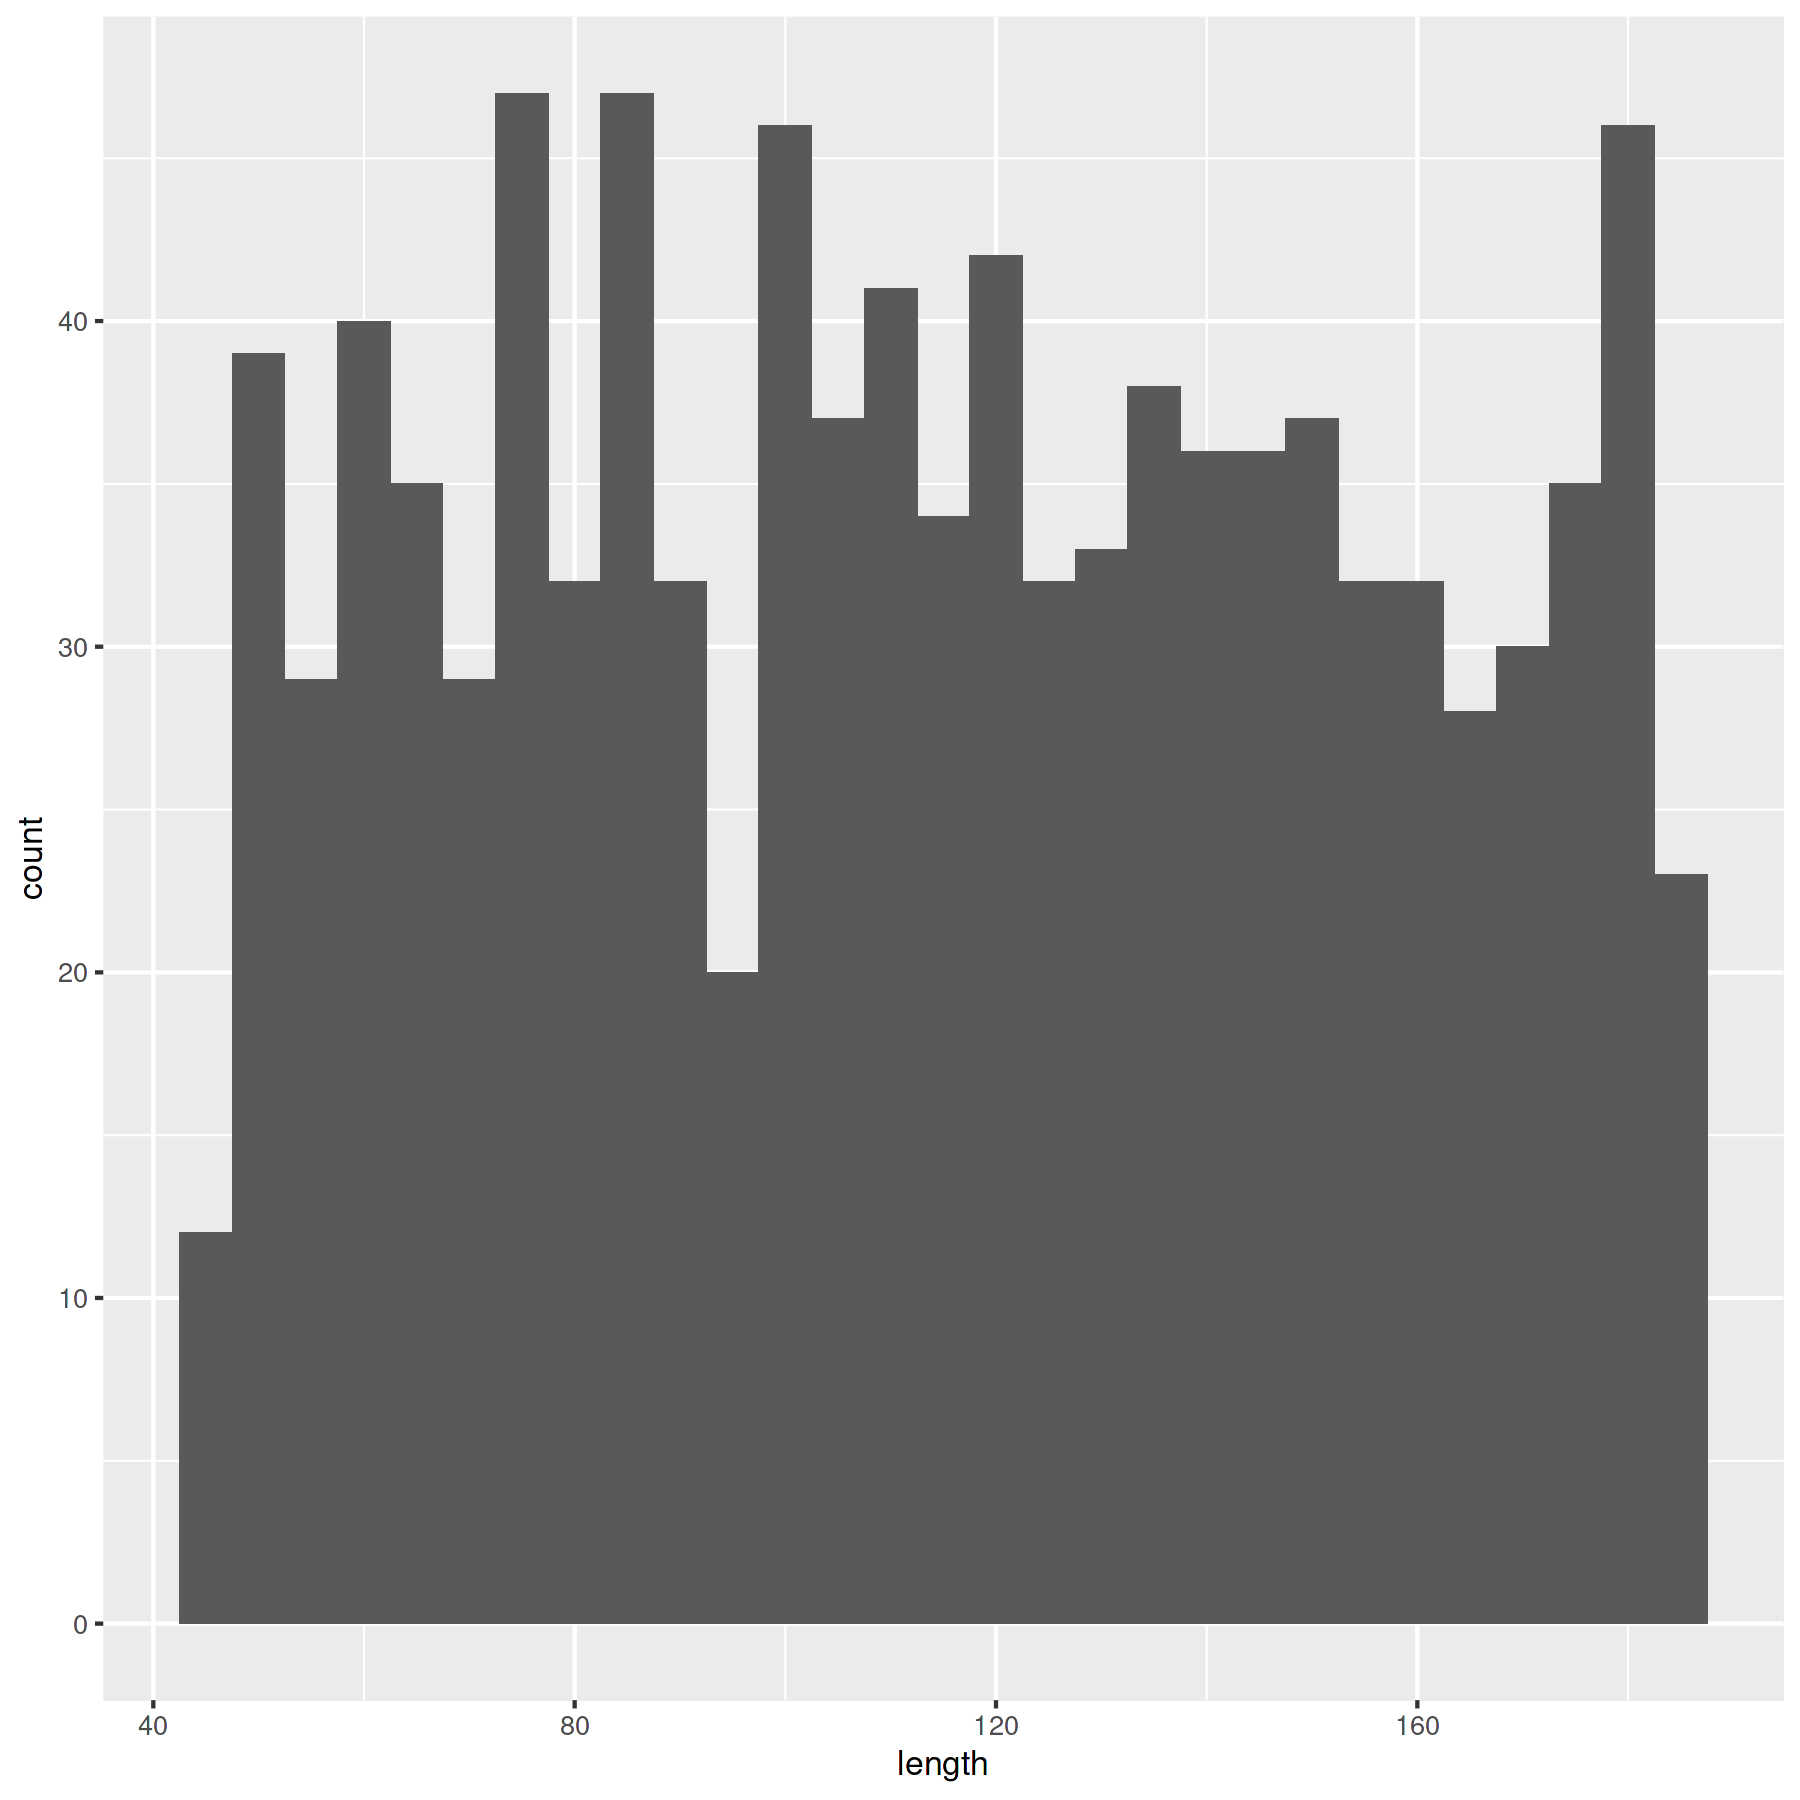

In [25]:
query <- "
SELECT *
FROM film;
"
tabla1 <- dbGetQuery(con, query)

ggplot(tabla1, aes(x=length)) +
    geom_histogram(binwidth=5)

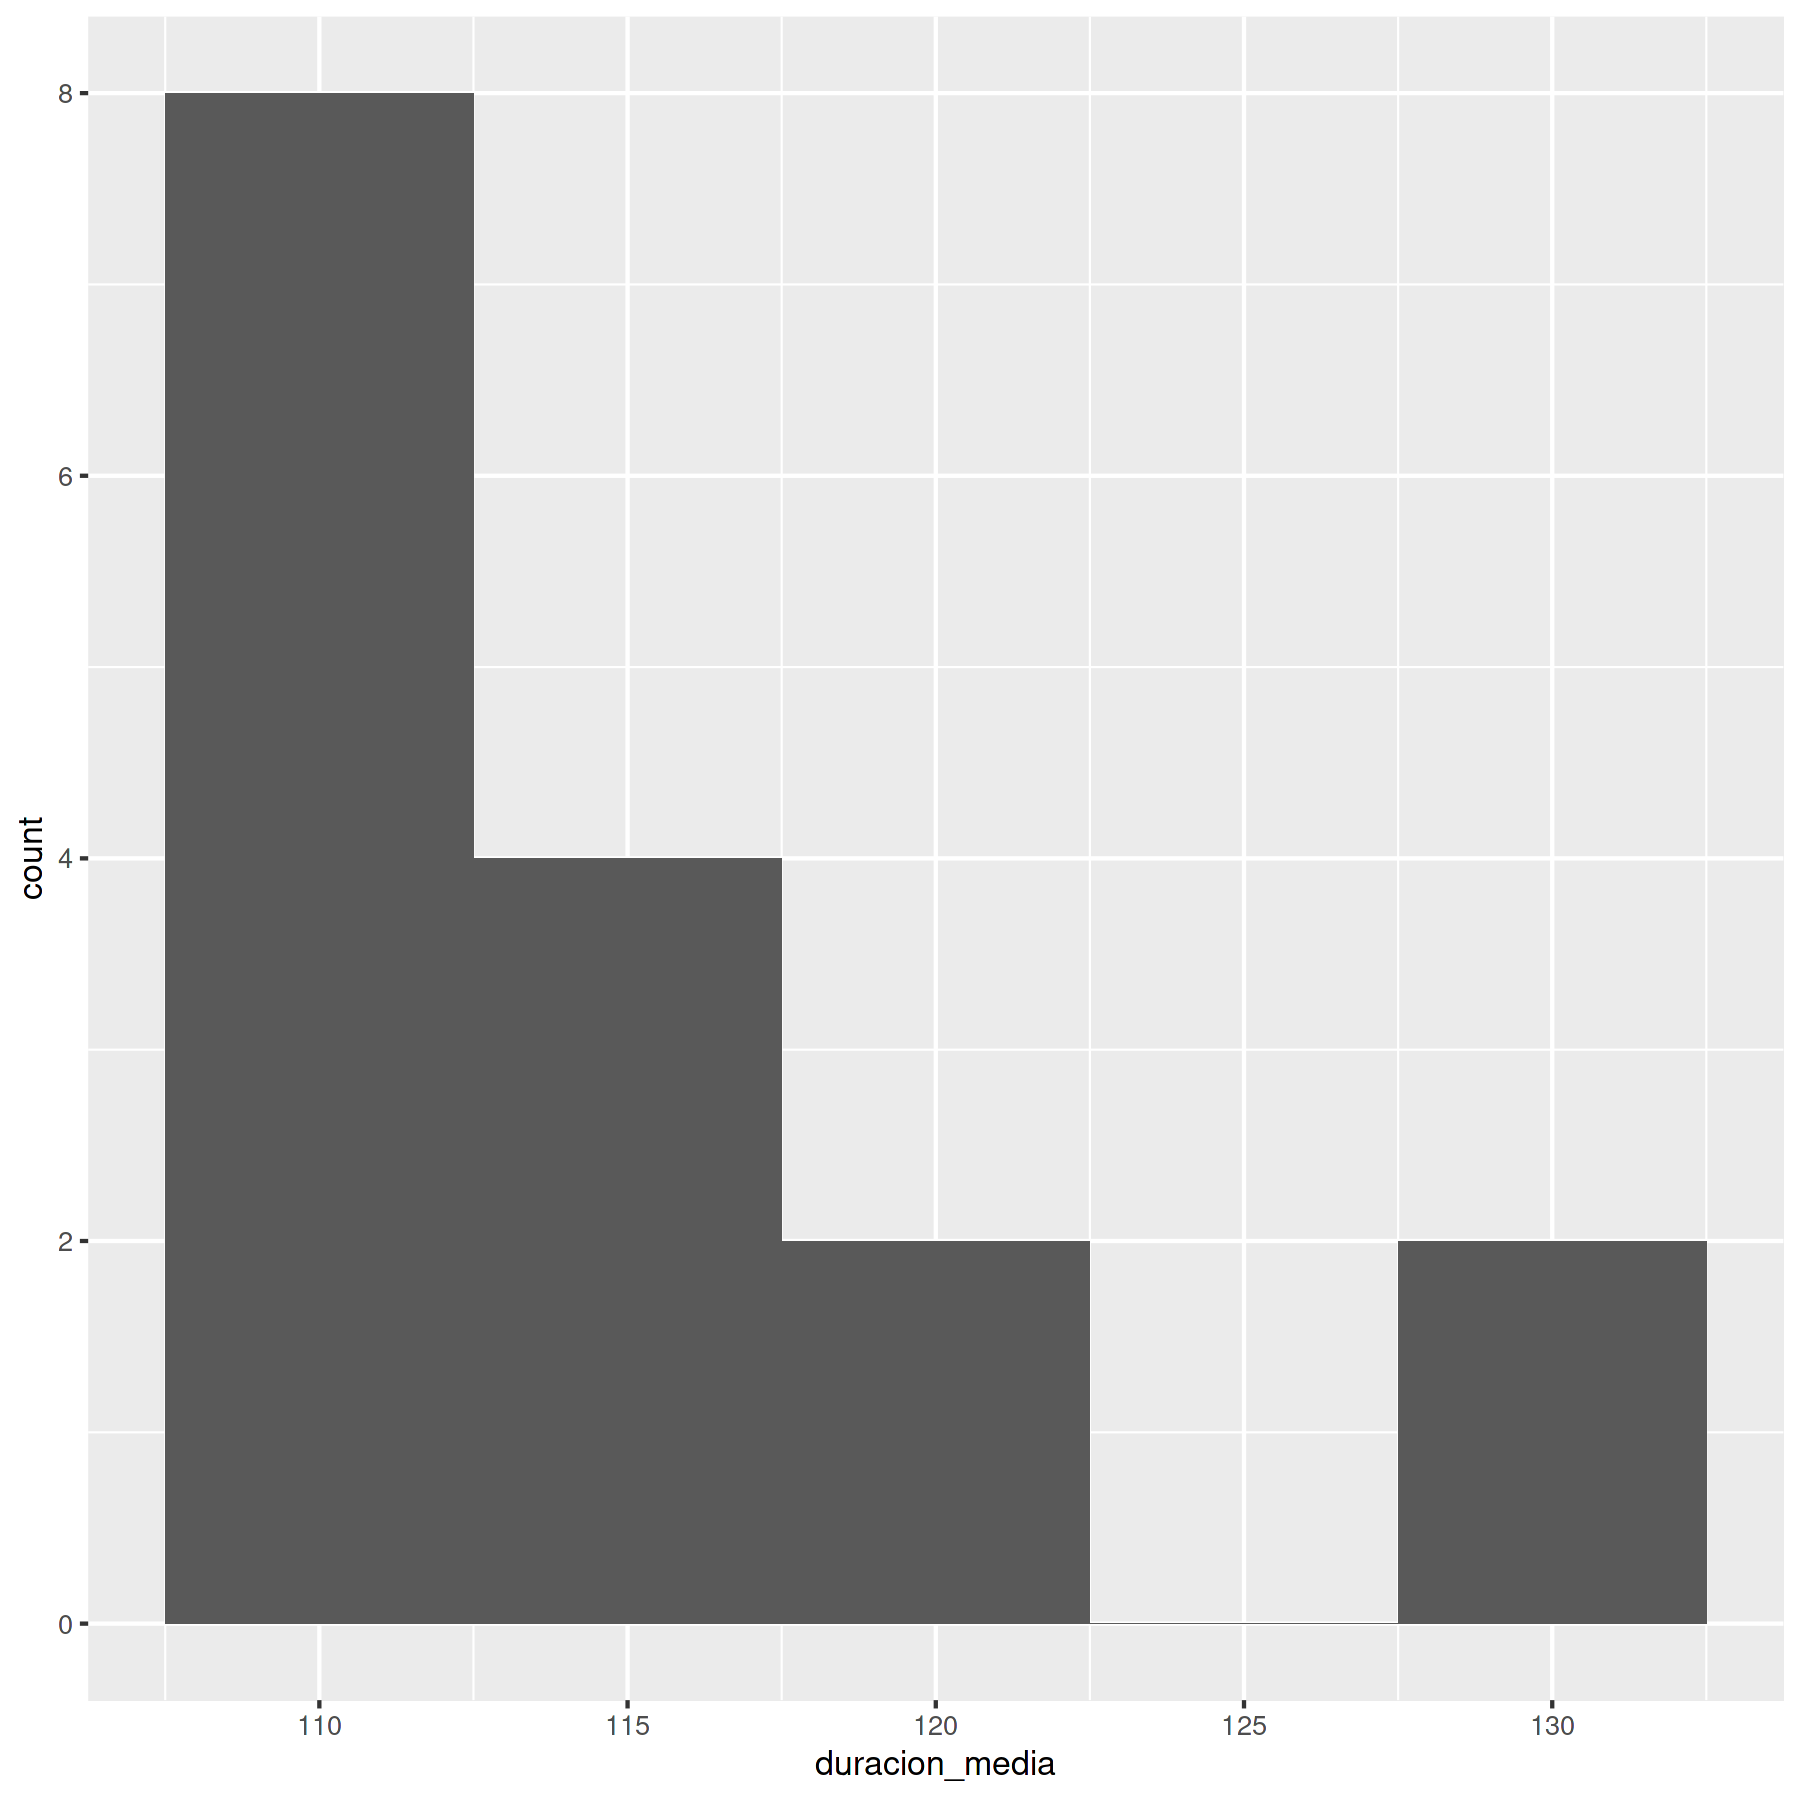

In [26]:
query <- "
SELECT name AS categoria, AVG(length) AS duracion_media
FROM film, film_category, category
WHERE film.film_id = film_category.film_id AND
    film_category.category_id = category.category_id
GROUP BY categoria
ORDER BY categoria;
"
tabla2 <- dbGetQuery(con, query)

ggplot(tabla2, aes(x=duracion_media)) +
    geom_histogram(binwidth=5)

# Pregunta 8 (0.5 pts) 
Consulte si es que la película 'Academy Dinosaur' esta disponible para arrender de la tienda con id 1.

In [27]:
query <- "
SELECT store_id, title
FROM inventory, film
WHERE inventory.film_id = film.film_id AND
    store_id = 1 AND
    title = 'ACADEMY DINOSAUR'
"
dbGetQuery(con, query)

store_id,title
<int>,<chr>
1,ACADEMY DINOSAUR
1,ACADEMY DINOSAUR
1,ACADEMY DINOSAUR
1,ACADEMY DINOSAUR
